<a href="https://colab.research.google.com/github/pacogp/TFM/blob/main/importancia_importe_comisiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objetivo 3: Evaluación e importancia de las comisiones dadas a representantes & Ventas


In [1]:
# para la importación de los datos: definimos la función upload_files

from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import io

def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [2]:
# llamamos a la función, seleccionams el archivo y mostramos la cabecera del mismo IMPORTANCIA_IMPORTE_COMISIONES.csv 
# ruta archivo de datos https://github.com/pacogp/TFM

train = upload_files()
train.head()

Saving IMPORTANCIA_IMPORTE_COMISIONES.csv to IMPORTANCIA_IMPORTE_COMISIONES.csv
User uploaded file "IMPORTANCIA_IMPORTE_COMISIONES.csv" with length 82358 bytes


,FECHA,MARGEN_BRUTO,I_BRUTO,UNIDADES,IMPORTE_LINEA,COSTE_MP,COSTE_TAPIZADO,DTO_LINEAS,DTO_PP,I_COMISION,MARGEN_LINEA,NUMERO_PLAZAS,PIB,TASA_PARO,HIPOTECA
0,2019-01-07,20090.23,22052.01,66,22052.01,10922.96,3801.76,1764.44,197.35,783.97,11129.14,8325,23662.941176,15.050588,2377.000000
1,2019-01-08,25030.71,26924.94,65,26385.36,11589.97,3534.20,1572.04,322.18,1122.06,14795.59,9425,25933.500000,12.866154,1665.384615
2,2019-01-09,17002.75,18383.46,40,16854.57,7419.34,1987.35,1193.47,187.24,620.97,9435.24,5900,26438.444444,13.215000,2434.055556
3,2019-01-10,47772.94,52082.88,125,48475.74,21573.77,6387.27,3542.97,766.92,2348.68,26902.13,19725,23054.673469,15.439592,2220.632653
4,2019-01-11,16782.38,18643.06,40,17564.48,7498.09,2175.50,1654.12,206.56,563.45,10066.46,6300,25690.352941,12.775294,2408.176471


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


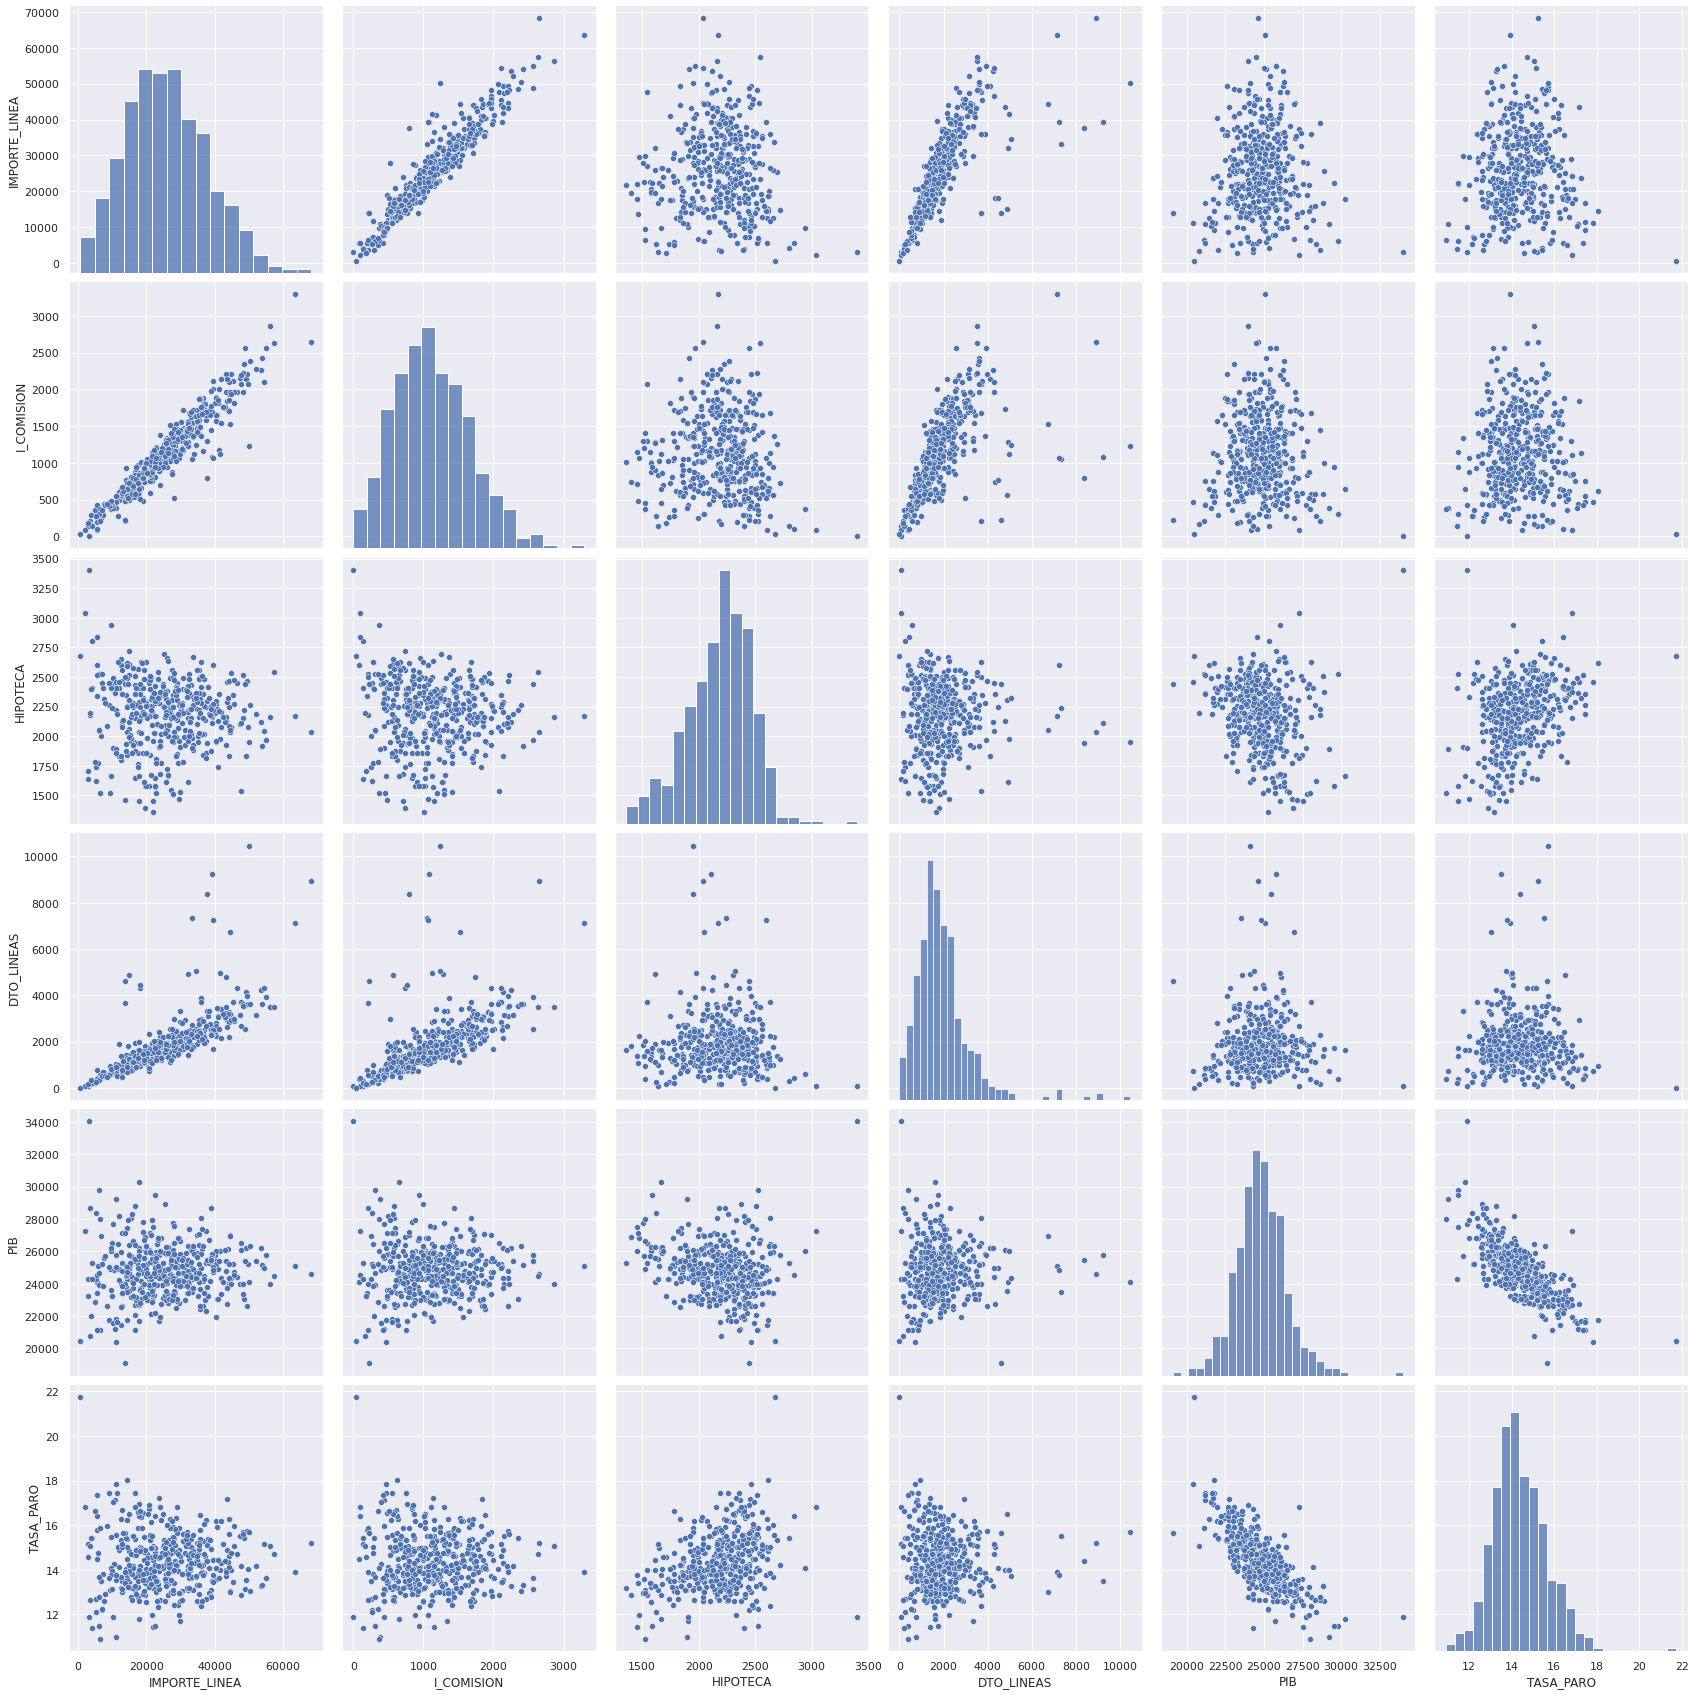

In [3]:
#scatterplot

sns.set()
cols = ['IMPORTE_LINEA', 'I_COMISION','HIPOTECA','DTO_LINEAS','PIB', 'TASA_PARO']
sns.pairplot(train[cols], size = 4)
plt.show();

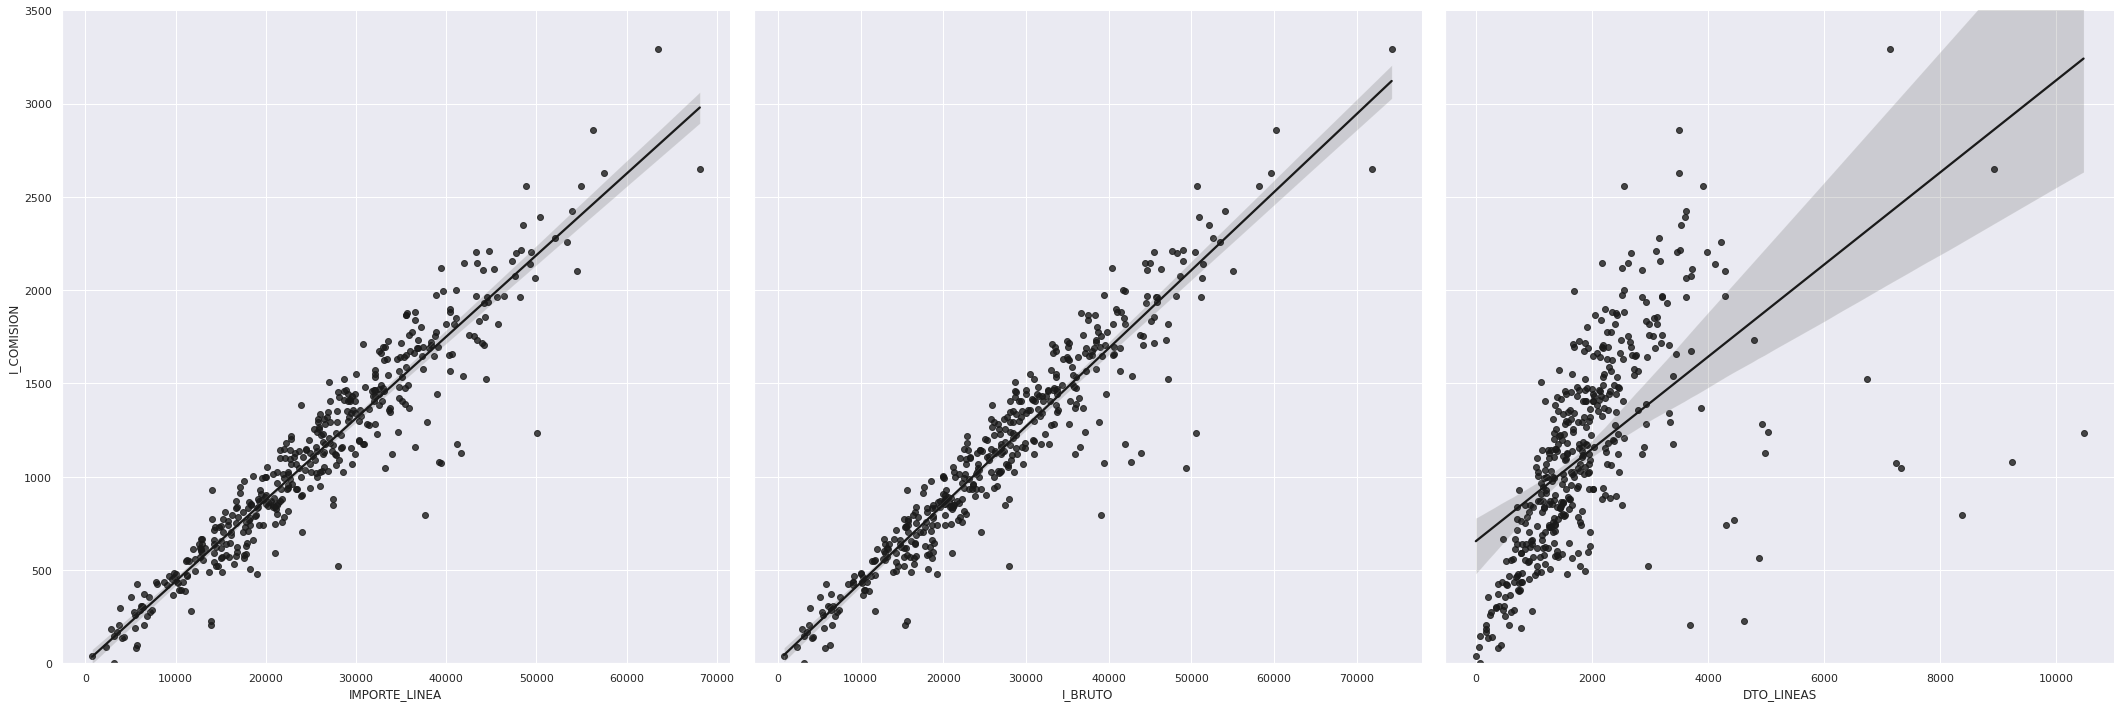

In [4]:
cols = ['IMPORTE_LINEA', 'I_BRUTO','DTO_LINEAS']
g = sns.PairGrid(train, y_vars=["I_COMISION"], x_vars=cols, height=10)
g.map(sns.regplot, color=".1")
g.set(ylim=(0, 3500))

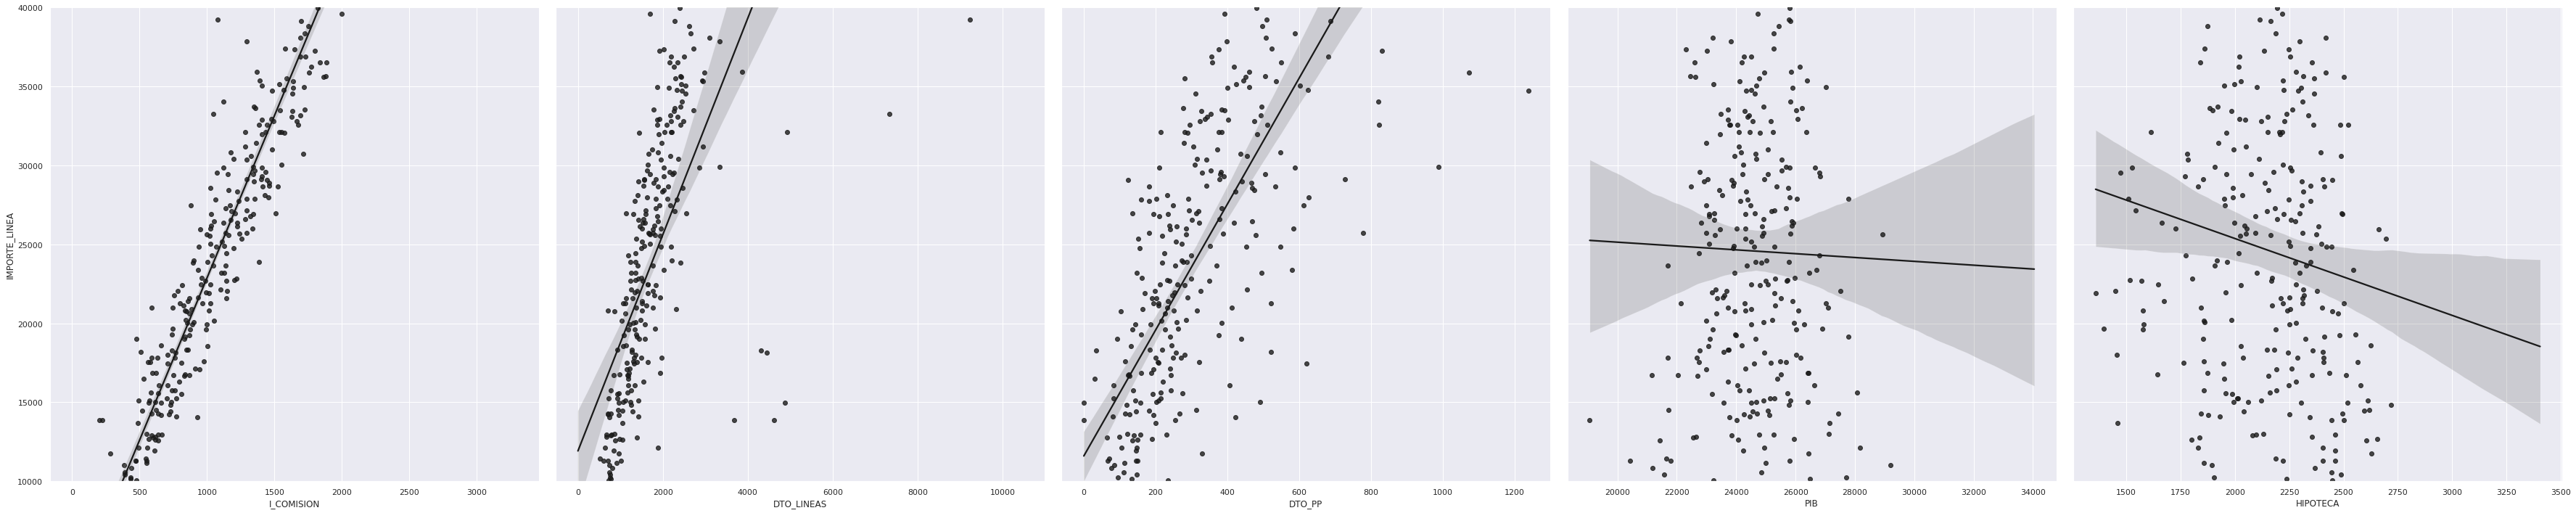

In [53]:
cols = ['I_COMISION', 'DTO_LINEAS','DTO_PP','PIB','HIPOTECA']
g = sns.PairGrid(train, y_vars=["IMPORTE_LINEA"], x_vars=cols, height=10)
g.map(sns.regplot, color=".1")
g.set(ylim=(10000, 40000))

In [5]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving IMPORTANCIA_IMPORTE_COMISIONES.csv to IMPORTANCIA_IMPORTE_COMISIONES (1).csv
User uploaded file "IMPORTANCIA_IMPORTE_COMISIONES.csv" with length 82358 bytes


In [6]:
# Indexamos por el campo 'FECHA'

comisiones = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), 
                    index_col = 'FECHA')
comisiones.head()

,MARGEN_BRUTO,I_BRUTO,UNIDADES,IMPORTE_LINEA,COSTE_MP,COSTE_TAPIZADO,DTO_LINEAS,DTO_PP,I_COMISION,MARGEN_LINEA,NUMERO_PLAZAS,PIB,TASA_PARO,HIPOTECA
FECHA,,,,,,,,,,,,,,
2019-01-07,20090.23,22052.01,66,22052.01,10922.96,3801.76,1764.44,197.35,783.97,11129.14,8325,23662.941176,15.050588,2377.000000
2019-01-08,25030.71,26924.94,65,26385.36,11589.97,3534.20,1572.04,322.18,1122.06,14795.59,9425,25933.500000,12.866154,1665.384615
2019-01-09,17002.75,18383.46,40,16854.57,7419.34,1987.35,1193.47,187.24,620.97,9435.24,5900,26438.444444,13.215000,2434.055556
2019-01-10,47772.94,52082.88,125,48475.74,21573.77,6387.27,3542.97,766.92,2348.68,26902.13,19725,23054.673469,15.439592,2220.632653
2019-01-11,16782.38,18643.06,40,17564.48,7498.09,2175.50,1654.12,206.56,563.45,10066.46,6300,25690.352941,12.775294,2408.176471


Vamos a dividir nuestro conjunto de datos en dos partes una para entrenamiento y otra para test. Para ello vamos a utilizar los datos de 2019 y la mitad de 2020 para entrenamiento y el resto de 2020 para los tests.

In [7]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [8]:
df = comisiones[['COSTE_MP', 'DTO_LINEAS', 'DTO_PP',
                 'I_BRUTO', 'I_COMISION', 'IMPORTE_LINEA', 'MARGEN_BRUTO', 
                 'MARGEN_LINEA', 'NUMERO_PLAZAS', 'UNIDADES', 'HIPOTECA', 'PIB', 'TASA_PARO']]

train = df.loc['2019-01-07':'2020-06-30']
test  = df.loc['2020-07-01':]

display_side_by_side(train.tail(),test.head())

,COSTE_MP,DTO_LINEAS,DTO_PP,I_BRUTO,I_COMISION,IMPORTE_LINEA,MARGEN_BRUTO,MARGEN_LINEA,NUMERO_PLAZAS,UNIDADES,HIPOTECA,PIB,TASA_PARO
FECHA,,,,,,,,,,,,,
2020-06-24,23810.37,4231.38,619.46,53445.08,2256.98,53445.08,48594.25,29634.81,18800,126,2118.790698,26220.697674,13.278605
2020-06-25,16545.46,2446.03,1238.26,35824.44,1479.32,34717.84,32140.12,18172.51,11950,81,2292.903226,24327.129032,15.182258
2020-06-26,10655.21,2192.68,546.57,26074.35,938.17,24871.26,23335.10,14216.12,9125,61,2420.791667,25286.333333,14.097917
2020-06-29,17365.09,3069.03,397.72,41880.74,1851.29,41092.04,38414.01,23726.96,16425,99,2127.828571,23050.857143,14.420286
2020-06-30,17321.92,2279.57,687.98,40593.13,1694.67,39120.25,37625.57,21798.45,14000,97,2165.675676,25827.162162,13.498378
,COSTE_MP,DTO_LINEAS,DTO_PP,I_BRUTO,I_COMISION,IMPORTE_LINEA,MARGEN_BRUTO,MARGEN_LINEA,NUMERO_PLAZAS,UNIDADES,HIPOTECA,PIB,TASA_PARO
FECHA,,,,,,,,,,,,,
2020-07-01,20442.69,2549.36,457.79,50648.72,2559.70,48904.32,47641.54,28461.96,17100,114,2442.945946,25402.351351,13.124324
2020-07-02,5872.88,1163.73,228.08,15195.60,619.22,13256.60,13803.79,7383.74,5025,29,2135.133333,23393.400000,15.672667


In [9]:
# reseteamos el index con el fin de evitar problemas en la validación cruzada
train.reset_index(drop = True, inplace = True)

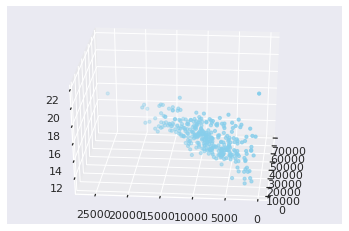

In [40]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train['IMPORTE_LINEA'], train['NUMERO_PLAZAS'], train['TASA_PARO'], c='skyblue', s=10)
ax.view_init(30, 185)
plt.show()

1. Parametrización
Existen diferentes parámetros que se pueden optimizar para la utilización de RandomForests, en este caso vamos a ceñirnos a a optimizar el número de estimadores que vamos a probar con distintas potencias de 2

In [11]:
from sklearn.model_selection import TimeSeriesSplit
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html
cv = TimeSeriesSplit() #

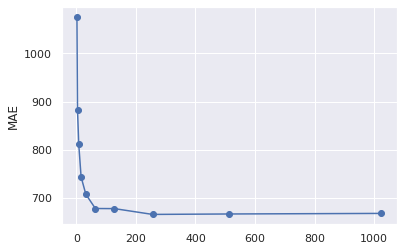

In [12]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

l_estimators = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

total_scores = []
for estimators in l_estimators:
   fold_accuracy = []
   regressor =  RandomForestRegressor(n_estimators= estimators, 
                  criterion='mae', random_state=0)
   for train_fold, test_fold in cv.split(train):
      # División train test aleatoria
      f_train = train.loc[train_fold]
      f_test = train.loc[test_fold]
      # entrenamiento y ejecución del modelo
      regressor.fit( X = f_train.drop(['IMPORTE_LINEA'], axis=1), 
                           y = f_train['IMPORTE_LINEA'])
      y_pred = regressor.predict(X = f_test.drop(['IMPORTE_LINEA'], axis = 1))
      # evaluación del modelo
      mae = mean_absolute_error(f_test['IMPORTE_LINEA'], y_pred)
      fold_accuracy.append(mae)
   total_scores.append(sum(fold_accuracy)/len(fold_accuracy))


  
plt.plot(l_estimators, total_scores, marker='o')
plt.ylabel('MAE')      
plt.show() 

In [14]:
best_est = l_estimators[np.argmin(total_scores)]
best_mae = min(total_scores)
print ("Min Value (estimators = %i, MAE = %6.2f)"  % (best_est, best_mae))

Min Value (estimators = 256, MAE = 666.26)


# 2. Construcción y ejecución del modelo 

Una vez que hemos identificado la mejor parametrización vamos a pasar a hacer una ejecución del modelo y vamos graficar sus resultados.

Recordamos que al final del paso 1 hemos dividido en entrenamiento/tuneado y test

Posteriormente, vamos a ejecutar el modelo con la mejor parametrización que hayamos obtenido anteriormente 

In [15]:
# Construimos el regresor
regressor =  RandomForestRegressor(n_estimators= best_est, criterion='mae', 
                                   random_state=0)
# Ajustamos y predecimos

regressor.fit( X = train.drop(['IMPORTE_LINEA'], axis=1), y = train['IMPORTE_LINEA'])
y_pred = regressor.predict(X = test.drop(['IMPORTE_LINEA'], axis = 1))

Calculamos el mae obtenido. 

In [16]:
mae = mean_absolute_error(test['IMPORTE_LINEA'], y_pred) 
print ('MAE', mae)

MAE 466.6348844553123


In [17]:
# Redondeamos el resultado y convertimos a entero
import numpy as np
res = np.rint(y_pred) # Redondeamos
res = res.astype(int) # Convertimos a entero
# Generamos la salida
output = pd.DataFrame({ 'FECHA': test.index, 'result': res})


from google.colab import files

with open('result_comisiones.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('result_comisiones.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Por último probamos visualizamos como ha quedado nuestra predicción con la realidad.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


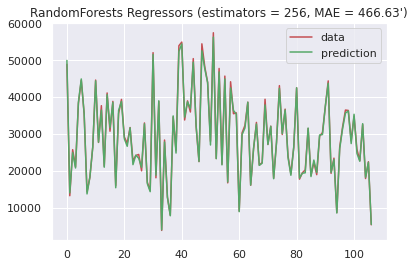

In [18]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(test['IMPORTE_LINEA'].shape[0]))
plt.plot(xx, test['IMPORTE_LINEA'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests Regressors (estimators = %i, MAE = %6.2f')" % (best_est, mae))

plt.show()

In [19]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': ( 'COSTE_MP', 'DTO_LINEAS', 'DTO_PP',
                              'I_BRUTO', 'I_COMISION', 'MARGEN_BRUTO', 'MARGEN_LINEA', 
                              'NUMERO_PLAZAS', 'UNIDADES', 'HIPOTECA', 'PIB', 'TASA_PARO') ,
              '% Importancia': regressor.feature_importances_})

Feature Relevancies


,Attributes,% Importancia
0,COSTE_MP,0.028374
1,DTO_LINEAS,0.006207
2,DTO_PP,0.002856
3,I_BRUTO,0.559044
4,I_COMISION,0.004880
5,MARGEN_BRUTO,0.272542
6,MARGEN_LINEA,0.090055
7,NUMERO_PLAZAS,0.010820
8,UNIDADES,0.016064
9,HIPOTECA,0.003153
